In [1]:
import os
import ee
import geemap
from IPython.display import display, clear_output, Image
from geemap import cartoee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# After executing this line of code for the first use, you can get the authentication number linked to Google.
#Map = geemap.Map()
# Authenticate the Google earth engine with google account
ee.Initialize() 
Map = geemap.Map()

In [6]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date('2021-01-01', '2021-12-31')) \
                  .select('precipitation') \
                  .mean()

precipitationVis = {
  #'bands' : ['precipitation'],
  'min': 1.0,
  'max': 17.0,
  'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
}

box = [-180,-88,180,88]

pre = dataset.visualize(**precipitationVis)

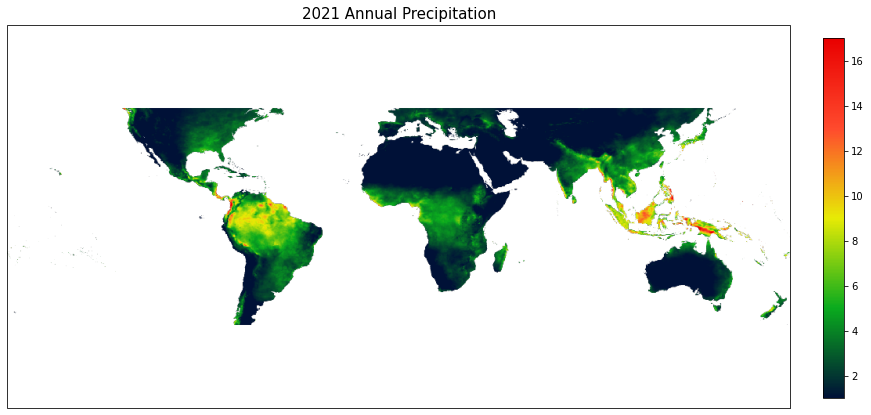

In [7]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(pre, region = box)
cb = cartoee.add_colorbar(ax, vis_params=precipitationVis, loc='right',label='')

ax.set_title(label='2021 Annual Precipitation', fontsize=15)

# ax.coastlines()
plt.savefig(r"C:\Users\Yang Hsiu\Desktop\plot\2021 Annual Precipitation.tiff", dpi=200)